## Analyzing basic statistics of "ShapeTalk"
#### E.g.,
- number of distinct objects per shape class
- utterances collected for hard vs. easy communication contexts


#### Some Notes:
    
Basic Lingo:

1. **Communication Context** =  A pair of objects. One acting as the "target" and one as the "distractor". We also refer sometimes to the distractor as the "source" object.
    
2. **Annotator** = A person creating referential language to separate the target from the distractor in a given communication context.

Plese see [README](https://github.com/optas/changeit3d/blob/main/assets/README_shapetalk.md) for a more detailed explanation.

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!git clone https://github.com/optas/changeit3d
%cd changeit3d
!git submodule add https://github.com/ThibaultGROUEIX/ChamferDistancePytorch changeit3d/losses/ChamferDistancePytorch
!pip install -e .
!pip install Ninja

fatal: destination path 'changeit3d' already exists and is not an empty directory.
/content/changeit3d/changeit3d/changeit3d
Cloning into '/content/changeit3d/changeit3d/changeit3d/changeit3d/losses/ChamferDistancePytorch'...
remote: Enumerating objects: 265, done.
remote: Total 265 (delta 0), reused 0 (delta 0), pack-reused 265
Receiving objects: 100% (265/265), 46.75 KiB | 1018.00 KiB/s, done.
Resolving deltas: 100% (163/163), done.
Obtaining file:///content/changeit3d/changeit3d/changeit3d
ERROR: file:///content/changeit3d/changeit3d/changeit3d does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
ERROR: Operation cancelled by user


In [ ]:
import pandas as pd
from ast import literal_eval
from collections import Counter
from termcolor import colored
from changeit3d.utils.visualization import visualize_src_trg_df_at_loc_i

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
### Use the **downloaded** ShapeTalk data and point to **_YOUR_** underlying directories:
top_img_dir = '../drive/Shareddrives/CS766/shapetalk_dataset/shapetalk/images/full_size/'
shapetalk_file =  '../drive/Shareddrives/CS766/shapetalk_dataset/shapetalk/language/shapetalk_preprocessed_public_version_0.csv'

In [ ]:
from pathlib import Path
import os

file = Path(shapetalk_file)
folder = Path(top_img_dir)
if os.path.exists(shapetalk_file):
  print("this exists")
else:
  print("no file")
directory_path = '.'
if os.path.exists(directory_path):
  print("path exists")
  contents = os.listdir(directory_path)
  for item in contents:
    print(item)
else:
  print('Directory doesnt exist')

no file
path exists
changeit3d
losses


In [ ]:
df = pd.read_csv(shapetalk_file)
print('Total collected entries/utterances', colored(len(df), 'red'))
print('Distinct workers:', colored(len(df.workerid.unique()), 'red'))
print('number of distinct classes', len(df.source_object_class.unique()))
classes = df.source_object_class.unique()
print(classes)


print("IMAGE BREAKDOWN IN OUR DIRECTORY")
# num_lines = sum(1 for _ in open('myfile.txt'))
# looking at the data we actually have loaded
for c in classes:
  curr_dir = os.path.join(top_img_dir, c)
  sub_dirs = os.listdir(curr_dir)
  for dirs in sub_dirs:
    count_img_data = 0
    sub_dir_path = os.path.join(curr_dir, dirs)
    images = os.listdir(sub_dir_path)
    for img in images:
      count_img_data +=1
    print(c, " > ", dirs, " > ", "number of image files: ", count_img_data)

print("POINT CLOUD BREAKDOWN IN OUR DIRECTORY")

pointcloud_dir = '../drive/Shareddrives/CS766/shapetalk_dataset/shapetalk/point_clouds/scaled_to_align_rendering'
for c2 in classes:
  pc_curr_dir = os.path.join(pointcloud_dir, c2)
  pc_sub_dir = os.listdir(pc_curr_dir)
  for pc_dir in pc_sub_dir:
    count_pc_data = 0
    pc_sub_dir_path = os.path.join(pc_curr_dir, pc_dir)
    point_clouds = os.listdir(pc_sub_dir_path)
    for pcs in point_clouds:
      count_pc_data +=1
    print(c2, " > ", pc_dir, " > ", "number of npz files: ", count_pc_data)

FileNotFoundError: [Errno 2] No such file or directory: '../drive/Shareddrives/CS766/shapetalk_dataset/shapetalk/language/shapetalk_preprocessed_public_version_0.csv'

In [ ]:
data_npz = {
    'mug': {'ShapeNet': 208},
    'vase': {'ShapeNet': 566, 'ModelNet': 257},
    'chair': {'ShapeNet': 6344, 'ModelNet': 264},
    'bottle': {'ShapeNet': 492},
    'trashbin': {'ShapeNet': 343},
    'person': {'ModelNet': 94},
    'bowl': {'PartNet': 27, 'ShapeNet': 178, 'ModelNet': 27},
    'dresser': {'ShapeNet': 187, 'ModelNet': 0},
    'sofa': {'ShapeNet': 2838, 'ModelNet': 227},
    'lamp': {'ModelNet': 86, 'ShapeNet': 2226}
}

In [ ]:
# use if want to generate smaller data subset of just classes we are concerned with
data_npz = {
    'mug': {'ShapeNet': 208},
    'vase': {'ShapeNet': 566, 'ModelNet': 257},
    'bottle': {'ShapeNet': 492},
    'lamp': {'ModelNet': 86, 'ShapeNet': 2226}
}

In [ ]:
data_img = {
    'cap': {'PartNet': 195, 'ShapeNet': 56},
    'plant': {'ModelNet': 332},
    'bookshelf': {'ShapeNet': 452, 'ModelNet': 629},
    'knife': {'ShapeNet': 424},
    'table': {'ShapeNet': 8436, 'ModelNet': 778},
    'skateboard': {'ShapeNet': 152},
    'mug': {'ShapeNet': 214},
    'vase': {'ModelNet': 585, 'ShapeNet': 596},
    'flowerpot': {'ShapeNet': 602, 'ModelNet': 169},
    'chair': {'ShapeNet': 6778, 'ModelNet': 989},
    'bottle': {'ShapeNet': 498},
    'trashbin': {'ShapeNet': 343},
    'person': {'ModelNet': 101},
    'bowl': {'PartNet': 30, 'ShapeNet': 186, 'ModelNet': 84},
    'guitar': {'ShapeNet': 797},
    'dresser': {'ShapeNet': 1571, 'ModelNet': 286},
    'bed': {'ShapeNet': 233, 'ModelNet': 615},
    'sofa': {'ShapeNet': 3173, 'ModelNet': 780},
    'lamp': {'ModelNet': 144, 'ShapeNet': 2845}
}

In [ ]:
# use if want to generate smaller data subset of just classes we are concerned with

data_img = {
    'mug': {'ShapeNet': 214},
    'vase': {'ModelNet': 585, 'ShapeNet': 596},
    'bottle': {'ShapeNet': 498},
    'lamp': {'ModelNet': 144, 'ShapeNet': 2845}
}

['pointcloud']
[[ 0.00405903 -0.17037419  0.19447088]
 [ 0.00234962  0.23719756 -0.22273017]
 [ 0.06456951 -0.1038859   0.25492301]
 ...
 [-0.1357172   0.09153408 -0.08841419]
 [-0.06948017  0.16672716 -0.05480445]
 [-0.02737785  0.19326547 -0.16294938]]


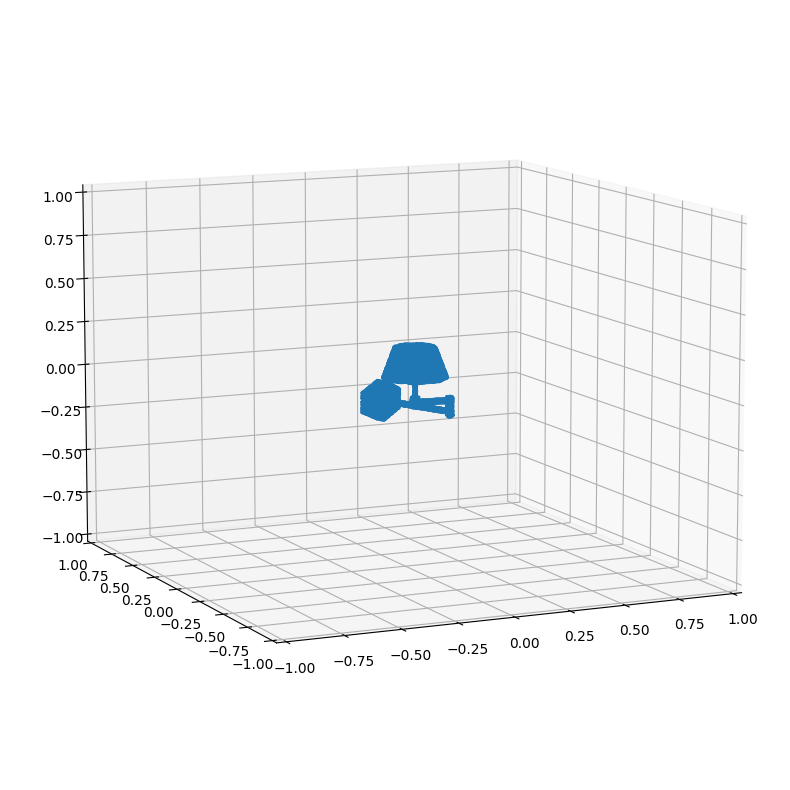

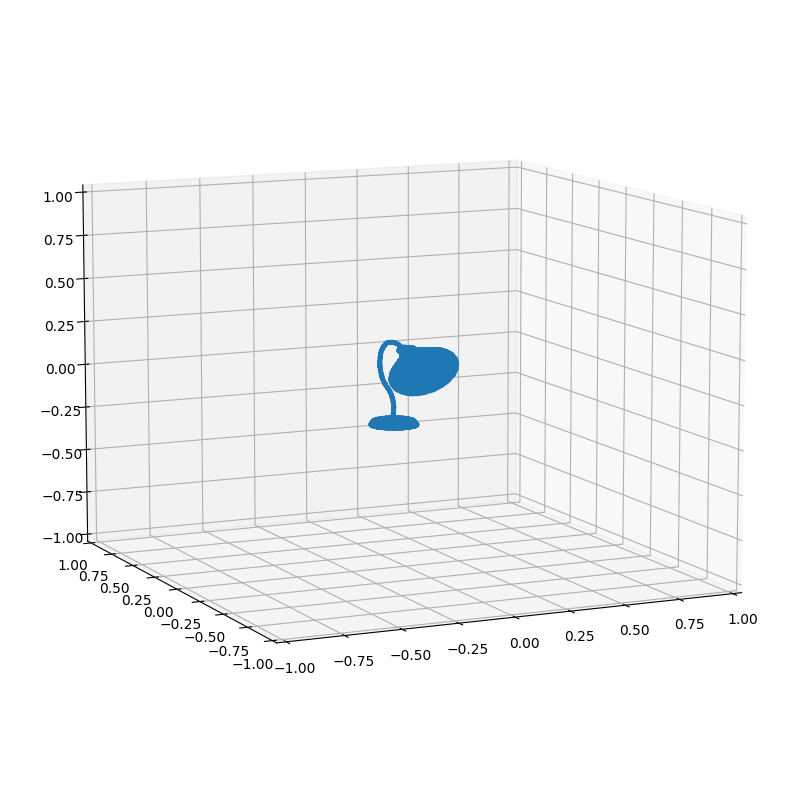

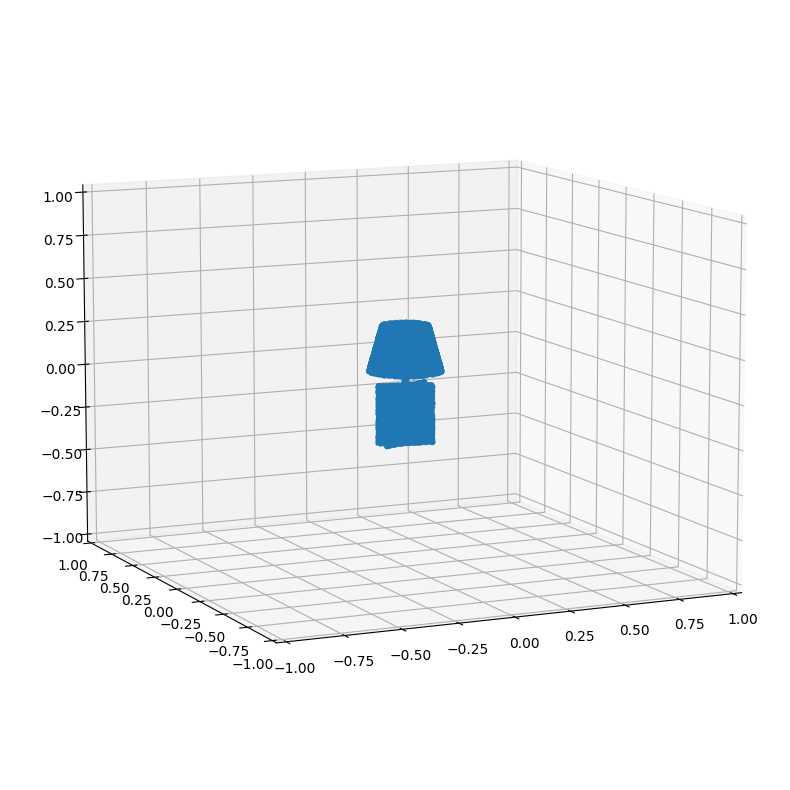

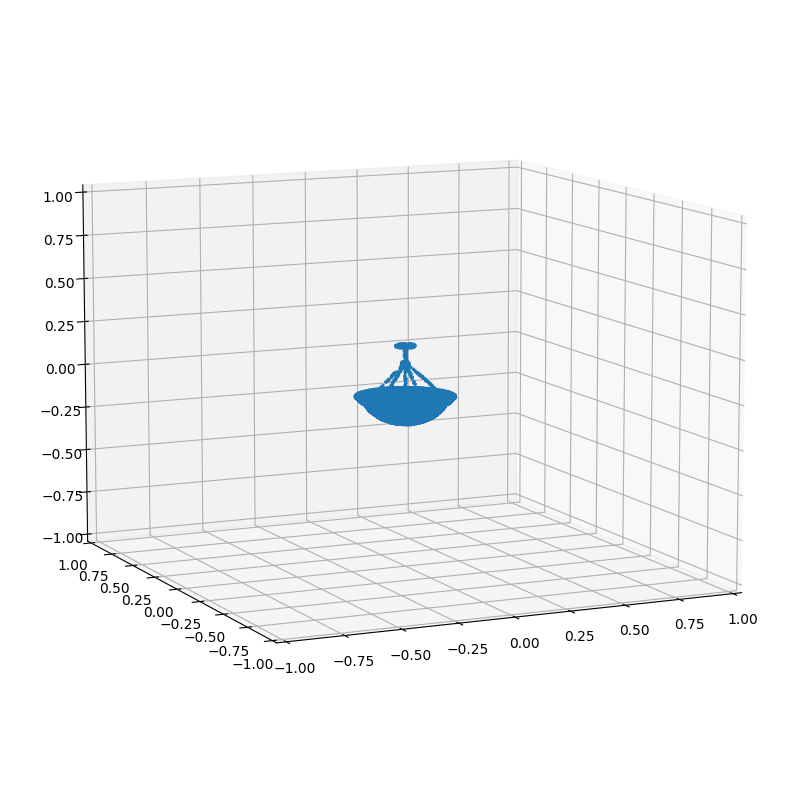

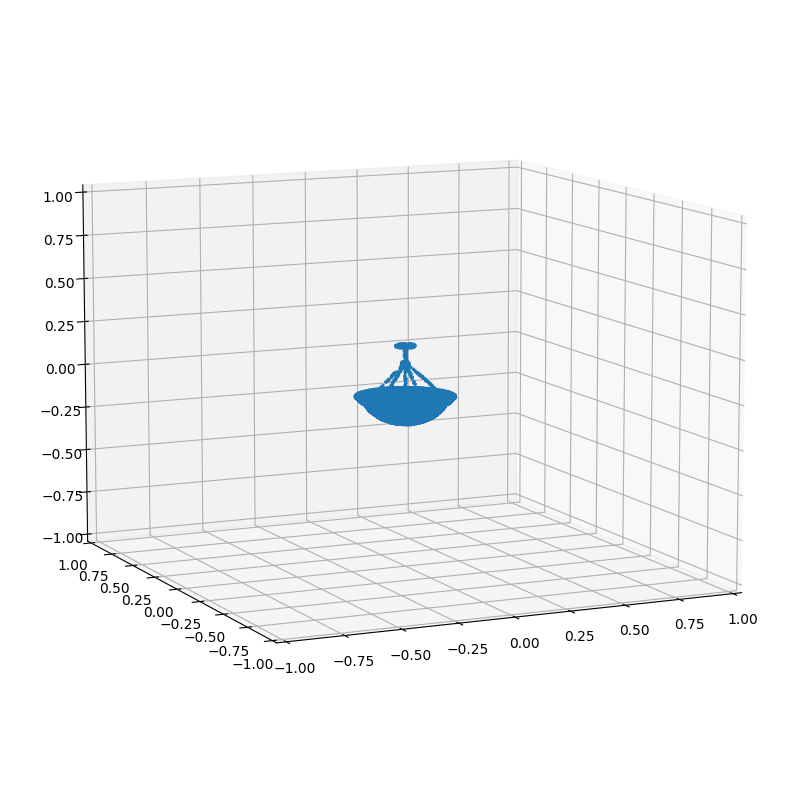

In [ ]:
import numpy as np
from changeit3d.utils.visualization import visualize_point_clouds_3d_v2
from changeit3d.utils.visualization import plot_3d_point_cloud

# Load the npz file
sample_npz = np.load('../drive/Shareddrives/CS766/shapetalk_dataset/shapetalk/point_clouds/scaled_to_align_rendering/lamp/ShapeNet/1a5ebc8575a4e5edcc901650bbbbb0b5.npz')
sample_npz2 = np.load('../drive/Shareddrives/CS766/shapetalk_dataset/shapetalk/point_clouds/scaled_to_align_rendering/lamp/ShapeNet/1a44dd6ee873d443da13974b3533fb59.npz')
sample_npz3 = np.load('../drive/Shareddrives/CS766/shapetalk_dataset/shapetalk/point_clouds/scaled_to_align_rendering/lamp/ShapeNet/9f5c3ea9f8254b8bd42b9650f19dd425.npz')
sample_npz4 = np.load('../drive/Shareddrives/CS766/shapetalk_dataset/shapetalk/point_clouds/scaled_to_align_rendering/lamp/ShapeNet/13e4f5f06cb42211fcb8d8c6d4df8143.npz')

# Check the keys in the npz file
print(sample_npz.files)

# Access the arrays in the npz file
array_test = sample_npz['pointcloud']
array_pc2 = sample_npz2['pointcloud']
array_pc3 = sample_npz3['pointcloud']
array_pc4 = sample_npz4['pointcloud']

print(array_test)

# visualize_point_clouds_3d_v2(array_test)
plot_3d_point_cloud(array_test, figsize=(10, 10), set_lim=0.2, visualization_pc_axis=(0,2,1))
plot_3d_point_cloud(array_pc2, figsize=(10, 10), set_lim=0.2, visualization_pc_axis=(0,2,1))
plot_3d_point_cloud(array_pc3, figsize=(10, 10), set_lim=0.2, visualization_pc_axis=(0,2,1))
plot_3d_point_cloud(array_pc4, figsize=(10, 10), set_lim=0.2, visualization_pc_axis=(0,2,1))


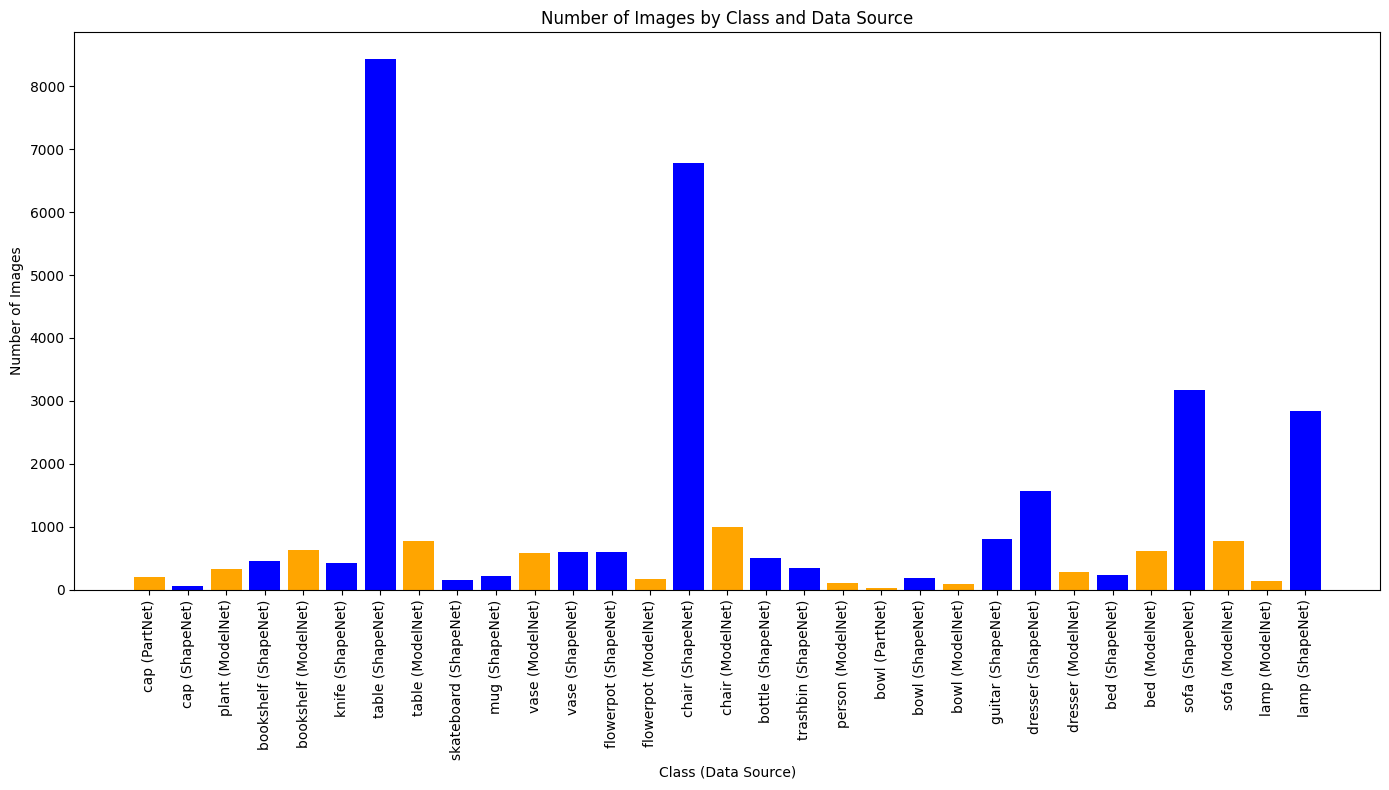

In [ ]:
import matplotlib.pyplot as plt

classes = []
shapes = []
numbers = []

# Extracting data for plotting
for cls, values in data_img.items():
    for source, count in values.items():
        classes.append(cls + ' (' + source + ')')
        shapes.append(source)
        numbers.append(count)

# Plotting the bar chart
plt.figure(figsize=(14, 8))
plt.bar(classes, numbers, color=['blue' if shape == 'ShapeNet' else 'orange' for shape in shapes])
plt.title('Number of Images by Class and Data Source')
plt.xlabel('Class (Data Source)')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

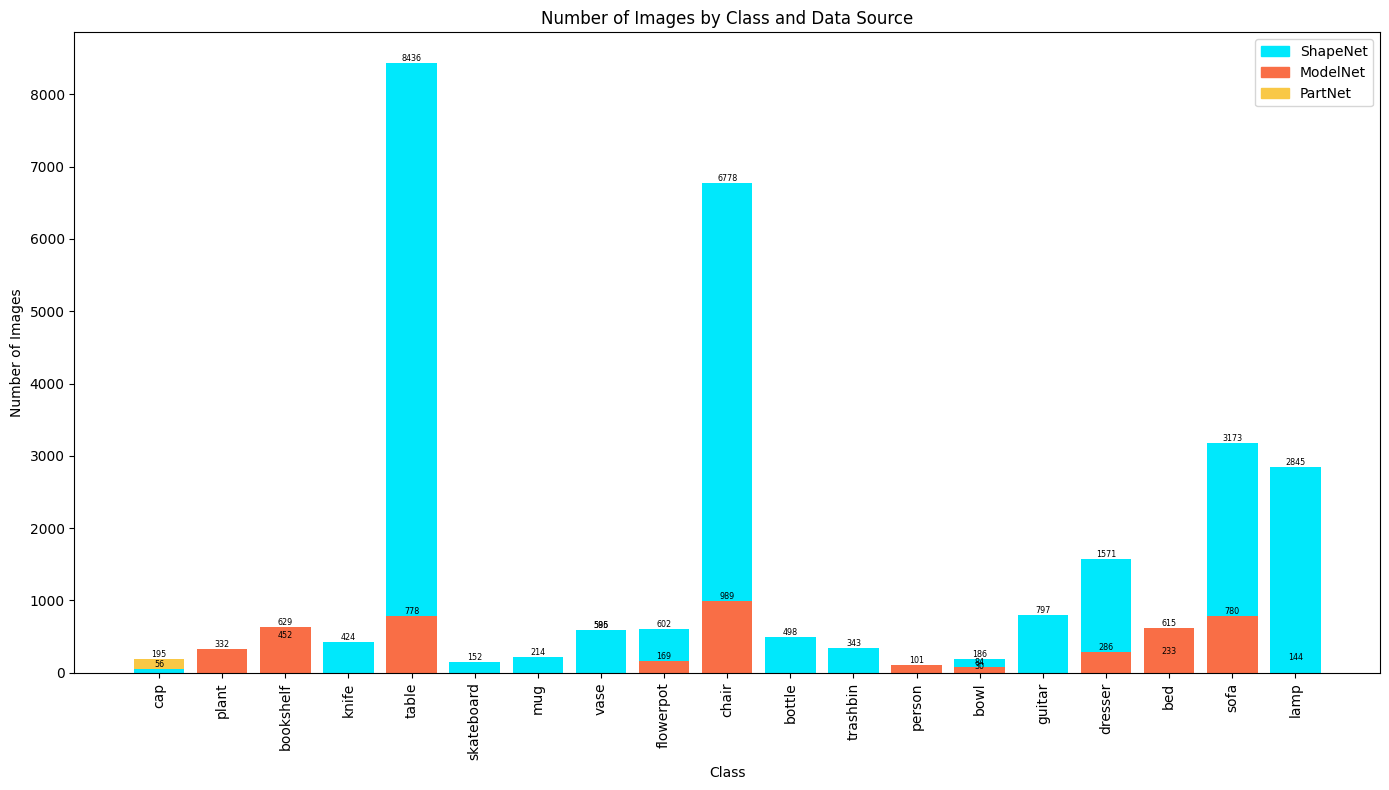

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Grouping data by class
grouped_data = defaultdict(dict)
for cls, values in data_img.items():
    for source, count in values.items():
        if cls not in grouped_data:
            grouped_data[cls] = {source: count}
        else:
            grouped_data[cls][source] = count

# Extracting data for plotting
classes = []
numbers = []
colors = []
sources = []

for cls, values in grouped_data.items():
    for source, count in values.items():
        classes.append(cls)
        numbers.append(count)
        sources.append(source)
        if source == 'ShapeNet':
            colors.append('#00E8FC')
        elif source == 'ModelNet':
            colors.append('#F96E46')
        elif source == 'PartNet':
            colors.append('#F9C846')


# Grouping data by class
grouped_data = defaultdict(dict)
for cls, values in data_img.items():
    for source, count in values.items():
        if cls not in grouped_data:
            grouped_data[cls] = {source: count}
        else:
            grouped_data[cls][source] = count

# Extracting data for plotting
classes = []
numbers = []
colors = []

for cls, values in grouped_data.items():
    for source, count in values.items():
        classes.append(cls)
        numbers.append(count)
        if source == 'ShapeNet':
            colors.append('#00E8FC')
        elif source == 'ModelNet':
            colors.append('#F96E46')
        elif source == 'PartNet':
            colors.append('#F9C846')

# Plotting the bar chart
plt.figure(figsize=(14, 8))

# Plotting bars
bars = plt.bar(classes, numbers, color=colors)

# Adding counts on the bars
for bar, num in zip(bars, numbers):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, num, ha='center', va='bottom', fontsize='xx-small')

# Adding legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in ['#00E8FC', '#F96E46', '#F9C846']]
plt.legend(handles, ['ShapeNet', 'ModelNet', 'PartNet'])

plt.title('Number of Images by Class and Data Source')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

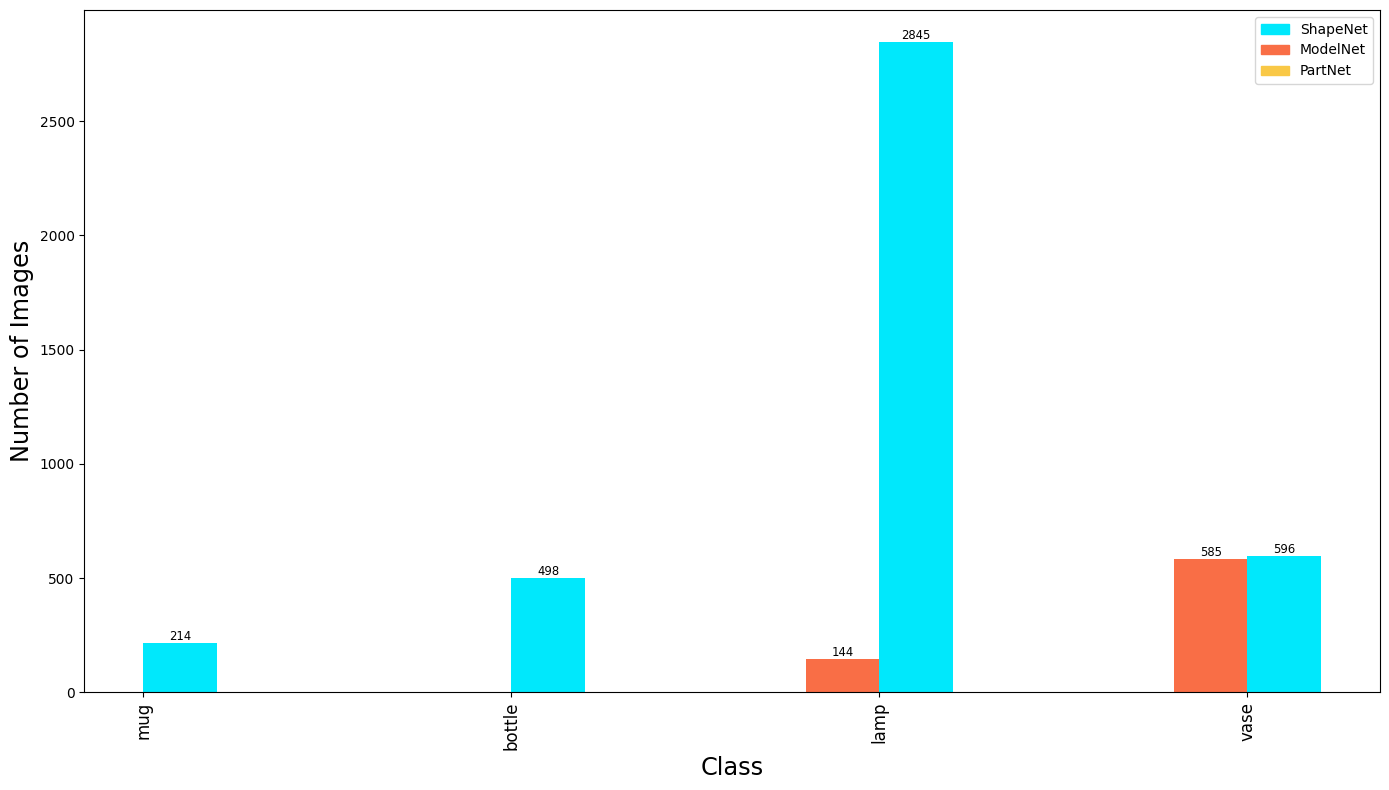

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Grouping data by class
grouped_data = defaultdict(dict)
for cls, values in data_img.items():
    for source, count in values.items():
        grouped_data[cls][source] = count

# Extracting data for plotting
classes = []
numbers = []
colors = []
sources = []

for cls, values in grouped_data.items():
    for source, count in values.items():
        classes.append(cls)
        numbers.append(count)
        sources.append(source)
        if source == 'ShapeNet':
            colors.append('#00E8FC')
        elif source == 'ModelNet':
            colors.append('#F96E46')
        elif source == 'PartNet':
            colors.append('#F9C846')

# Plotting the bar chart
plt.figure(figsize=(14, 8))

# Determine the width for each bar
bar_width = 0.2

# Calculate the number of sources
num_sources = len(set(sources))

# Iterate through each class and plot bars for each source
for i, cls in enumerate(set(classes)):
    # Calculate the x-coordinate for the first bar of the current class
    x_start = i - (num_sources - 1) * bar_width / 2

    # Iterate through each source and plot bars
    for j, source in enumerate(set(sources)):
        # Calculate the index of the current data point
        index = next((index for index, (c, s) in enumerate(zip(classes, sources)) if c == cls and s == source), None)
        if index is not None:
            # Calculate the x-coordinate for the current bar
            x = x_start + j * bar_width

            # Find the count for the current source and class
            count = numbers[index]

            # Plot the bar
            plt.bar(x, count, color=colors[index], width=bar_width, label=source)

            # Add count above the bar
            plt.text(x, count, str(count), ha='center', va='bottom',fontsize='small')

# Adding legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in ['#00E8FC', '#F96E46', '#F9C846']]
plt.legend(handles, ['ShapeNet', 'ModelNet', 'PartNet'])

# Set x ticks and labels
plt.xticks(range(len(set(classes))), set(classes), rotation=90, fontsize='large')

# plt.title('Number of Images by Class and Data Source')
plt.xlabel('Class', fontsize='xx-large')
plt.ylabel('Number of Images', fontsize='xx-large')
plt.tight_layout()
plt.show()

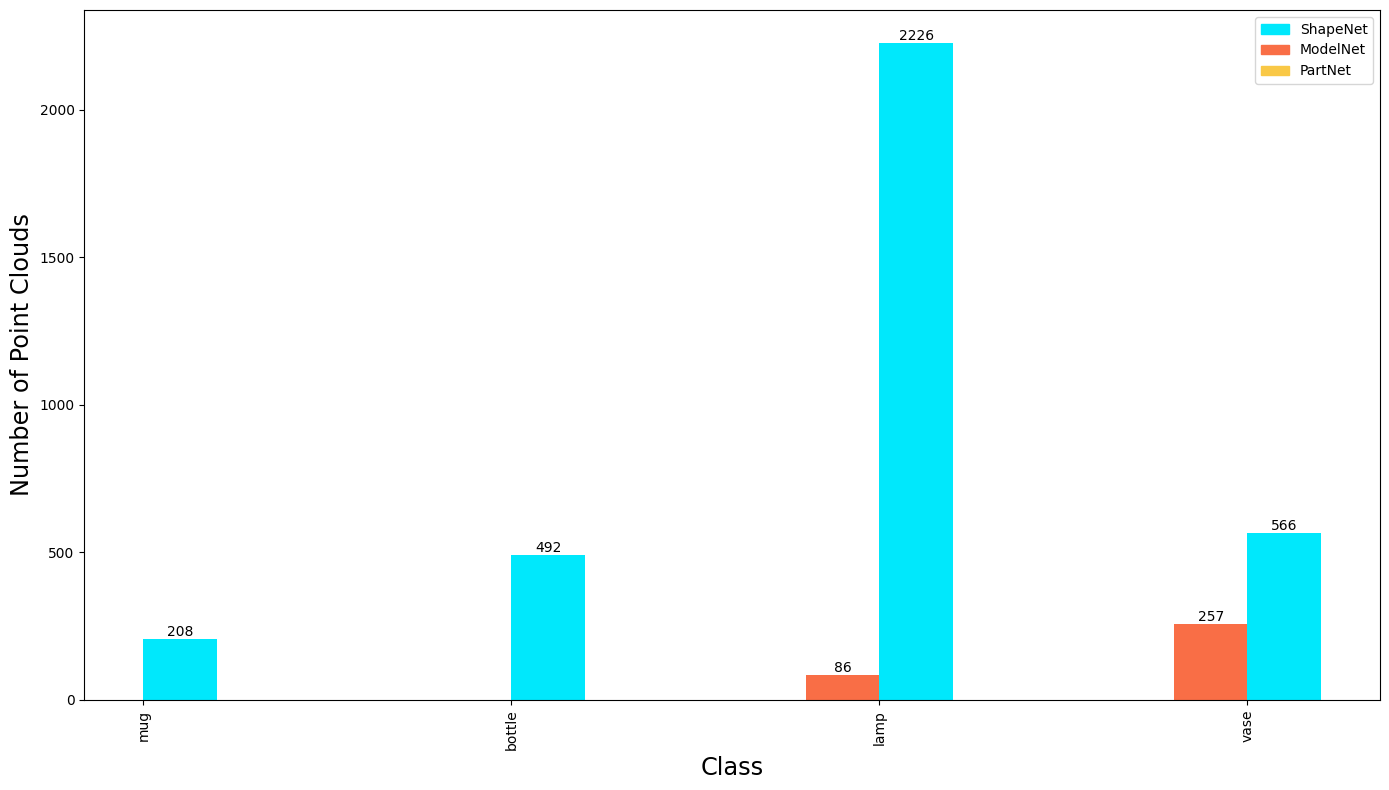

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Grouping data by class
grouped_data = defaultdict(dict)
for cls, values in data_npz.items():
    for source, count in values.items():
        grouped_data[cls][source] = count

# Extracting data for plotting
classes = []
numbers = []
colors = []
sources = []

for cls, values in grouped_data.items():
    for source, count in values.items():
        classes.append(cls)
        numbers.append(count)
        sources.append(source)
        if source == 'ShapeNet':
            colors.append('#00E8FC')
        elif source == 'ModelNet':
            colors.append('#F96E46')
        elif source == 'PartNet':
            colors.append('#F9C846')

# Plotting the bar chart
plt.figure(figsize=(14, 8))

# Determine the width for each bar
bar_width = 0.2

# Calculate the number of sources
num_sources = len(set(sources))

# Iterate through each class and plot bars for each source
for i, cls in enumerate(set(classes)):
    # Calculate the x-coordinate for the first bar of the current class
    x_start = i - (num_sources - 1) * bar_width / 2

    # Iterate through each source and plot bars
    for j, source in enumerate(set(sources)):
        # Calculate the index of the current data point
        index = next((index for index, (c, s) in enumerate(zip(classes, sources)) if c == cls and s == source), None)
        if index is not None:
            # Calculate the x-coordinate for the current bar
            x = x_start + j * bar_width

            # Find the count for the current source and class
            count = numbers[index]

            # Plot the bar
            plt.bar(x, count, color=colors[index], width=bar_width, label=source)

            # Add count above the bar
            plt.text(x, count, str(count), ha='center', va='bottom')

# Adding legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in ['#00E8FC', '#F96E46', '#F9C846']]
plt.legend(handles, ['ShapeNet', 'ModelNet', 'PartNet'])

# Set x ticks and labels
plt.xticks(range(len(set(classes))), set(classes), rotation=90)

# plt.title('Number of Point Cloud Files by Class and Data Source')
plt.xlabel('Class', fontsize='xx-large')
plt.ylabel('Number of Point Clouds', fontsize='xx-large')
plt.tight_layout()
plt.show()

In [ ]:
from pathlib import Path
import os

file = Path(shapetalk_file)
folder = Path(top_img_dir)
if os.path.exists(shapetalk_file):
  print("this exists")
else:
  print("no file")
directory_path = '../drive/Shareddrives/CS766/shapetalk_dataset/shapetalk/images/full_size/lamp'
if os.path.exists(directory_path):
  print("path exists")
  contents = os.listdir(directory_path)
  for item in contents:
    print(item)
else:
  print('Directory doesnt exist')


no file
Directory doesnt exist


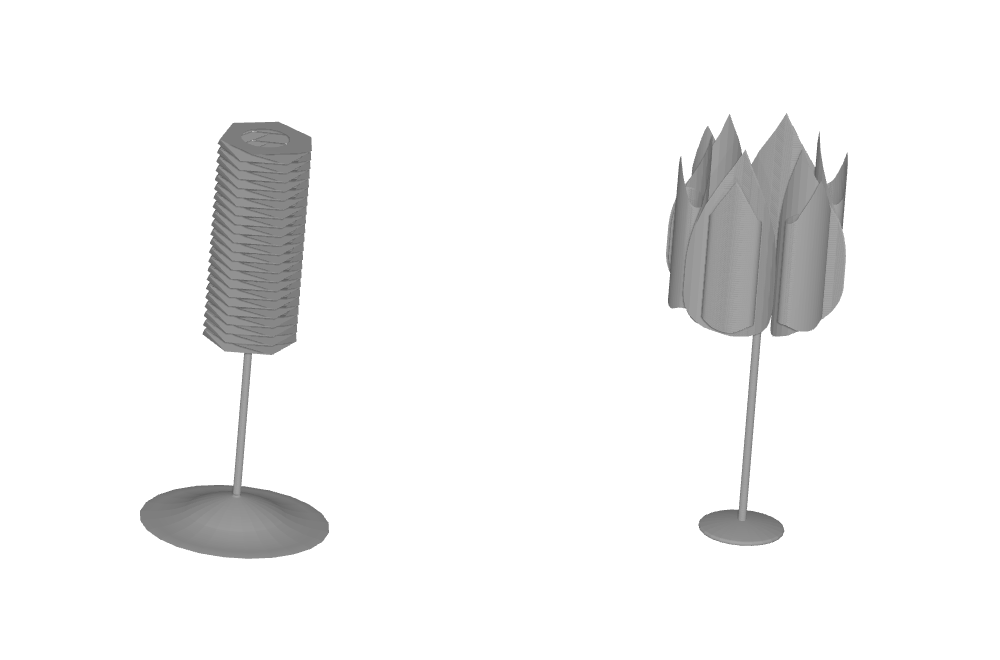

39ZSFO5CAAPX7R3WP1ZIXBRATMZJUY
utterance0:
Original: The target has a distinctive top shaped like a pointy crown.
Spelled: the target has a distinctive top shaped like a pointy crown


In [ ]:
rid = 109584
visualize_src_trg_df_at_loc_i(df, rid, top_img_dir=top_img_dir)

In [ ]:
printout_latex = False
context = ['source_uid', 'target_uid'] # basic communication context

In [ ]:
g = df.groupby(context)
statistic = colored(len(g), 'red')
print(f'Number of distinct communication contexts in ShapeTalk: {statistic}')

statistic = colored(g.utterance.apply(len).mean().round(2), 'red')
print(f'Average number of utterances per communication context (considering different annotators of the same context as one) {statistic}')

g = df.groupby('assignmentid') # i.e., group by (all) the answers given by a signle (any) annotator for a given context
statistic = colored(g.size().mean().round(2), 'red')
print(f'Average number of utterances collected per annotator, per communication context {statistic}')

Number of distinct communication contexts in ShapeTalk: 73799
Average number of utterances per communication context (considering different annotators of the same context as one) 7.27
Average number of utterances collected per annotator, per communication context 4.12


In [ ]:
print('Train/Test/Val Splits for ChangeIt3D')
print(df.groupby('changeit_split').apply(len))

print('---')
print("Train/Test/Val Splits for AE networks and other `unary` (single-source-input) networks:")
for val in ['test', 'train', 'val']:
    targets = df.target_uid[df.target_unary_split == val].unique()
    distractors = df.source_uid[df.source_unary_split == val].unique()
    print(val, len(set(targets).union(set(distractors))))

print('---')
print('Train/Test/Val Splits for Neural Listening')
print(df.groupby('listening_split').apply(len))

print('---\n')
unique_contexts_for_listening = len((df[df.listening_split == 'test']).groupby(context))
print("Number of Unique Contexts for neural listening (test)", unique_contexts_for_listening)
unique_contexts_for_listening_train = len((df[df.listening_split == 'train']).groupby(context))
print("Number of Unique Contexts for neural listening (train)", unique_contexts_for_listening_train)
unique_contexts_for_listening_val = len((df[df.listening_split == 'val']).groupby(context))
print("Number of Unique Contexts for neural listening (val)", unique_contexts_for_listening_val)


Train/Test/Val Splits for ChangeIt3D
changeit_split
ignore     10517
test       51234
train     447961
val        26884
dtype: int64
---
Train/Test/Val Splits for AE networks and other `unary` (single-source-input) networks:
test 3637
train 30915
val 1839
---
Train/Test/Val Splits for Neural Listening
listening_split
ignore      3858
test       53341
train     452502
val        26895
dtype: int64
---

Number of Unique Contexts for neural listening (test) 7407
Number of Unique Contexts for neural listening (train) 62668
Number of Unique Contexts for neural listening (val) 3721


In [ ]:
train_data = df[df['listening_split'] == 'train']
train_counts = train_data.groupby('source_object_class').size()
print("listening split > train")
print(train_counts)

test_data = df[df['listening_split'] == 'test']
test_counts = test_data.groupby('source_object_class').size()
print("listening split > test")
print(test_counts)

val_data = df[df['listening_split'] == 'val']
val_counts = val_data.groupby('source_object_class').size()
print("listening split > val")
print(val_counts)


train_data_chit3d = df[df['changeit_split'] == 'train']
train_counts_chit3d = train_data_chit3d.groupby('source_object_class').size()
print("changeit_split > train")
print(train_counts_chit3d )

test_data_chit3d = df[df['changeit_split'] == 'test']
test_counts_chit3d = test_data_chit3d.groupby('source_object_class').size()
print("changeit_split > test")
print(test_counts_chit3d)

val_data_chit3d = df[df['changeit_split'] == 'val']
val_counts_chit3d = val_data_chit3d.groupby('source_object_class').size()
print("changeit_split > val")
print(val_counts_chit3d)

listening split > train
source_object_class
airplane      37551
bag            2765
bathtub       10142
bed           12581
bench         21665
bookshelf     13619
bottle         4978
bowl           2299
cabinet        3246
cap            3167
chair         62973
clock          7807
display       12451
dresser       28437
faucet         8547
flowerpot      8360
guitar         9938
helmet         1403
knife          5740
lamp          45583
mug            2103
person         2359
pistol         4000
plant          2804
scissors       1201
skateboard     2296
sofa          43923
table         74960
trashbin       4530
vase          11074
dtype: int64
listening split > test
source_object_class
airplane      4369
bag            330
bathtub       1161
bed           1493
bench         2568
bookshelf     1610
bottle         581
bowl           268
cabinet        398
cap            382
chair         7512
clock          913
display       1453
dresser       3351
faucet        1009
flowerpot      

In [ ]:
data = {
    'listening_split': ['train']*30 + ['test']*30 + ['val']*30,
    'source_object_class': ['airplane', 'bag', 'bathtub', 'bed', 'bench', 'bookshelf', 'bottle', 'bowl', 'cabinet', 'cap', 'chair', 'clock', 'display', 'dresser', 'faucet', 'flowerpot', 'guitar', 'helmet', 'knife', 'lamp', 'mug', 'person', 'pistol', 'plant', 'scissors', 'skateboard', 'sofa', 'table', 'trashbin', 'vase']*3,
    'count': [37551, 2765, 10142, 12581, 21665, 13619, 4978, 2299, 3246, 3167, 62973, 7807, 12451, 28437, 8547, 8360, 9938, 1403, 5740, 45583, 2103, 2359, 4000, 2804, 1201, 2296, 43923, 74960, 4530, 11074,
              4369, 330, 1161, 1493, 2568, 1610, 581, 268, 398, 382, 7512, 913, 1453, 3351, 1009, 982, 1170, 167, 669, 5323, 250, 270, 463, 323, 144, 265, 5177, 8912, 520, 1308,
              4369, 330, 1161, 1493, 2568, 1610, 581, 268, 398, 382, 7512, 913, 1453, 3351, 1009, 982, 1170, 167, 669, 5323, 250, 270, 463, 323, 144, 265, 5177, 8912, 520, 1308]
}

trainingData = pd.DataFrame(data)
trainingData.to_csv('../drive/Shareddrives/CS766/shapetalk_dataset/listening_training_breakdown.csv', index=False)
print(trainingData)

   listening_split source_object_class  count
0            train            airplane  37551
1            train                 bag   2765
2            train             bathtub  10142
3            train                 bed  12581
4            train               bench  21665
..             ...                 ...    ...
85             val          skateboard    265
86             val                sofa   5177
87             val               table   8912
88             val            trashbin    520
89             val                vase   1308

[90 rows x 3 columns]


# Language-oriented Analysis (basics)

In [ ]:
df.tokens = df.tokens.apply(literal_eval)

all_tokens = Counter()
df.tokens.apply(lambda x: all_tokens.update(x))
print('Number of unique tokens:', colored(len(all_tokens), 'red'))

# some assertions
assert (df.tokens.apply(lambda x: ' '.join(x)) == df.utterance_spelled).all(), "tokens are not spelled"
assert not df.hard_context.isna().any(), "not all contexts have a hard/easy label"

Number of unique tokens: 9251


In [ ]:
statistic = colored(df.hard_context.mean().round(3) * 100, 'red')
print('Percent of utterances from hard contexts:', statistic)

g = df.groupby(context)
statistic = g.hard_context.apply(lambda x: x.iloc[0]).mean().round(3) * 100
statistic = colored(statistic, 'red')
print('Percent of contexts that are hard:', statistic)

Percent of utterances from hard contexts: 49.5
Percent of contexts that are hard: 48.6


In [ ]:
for w in ['target', 'distractor']:
    print(f'Number of utterances where the word {w} is explicitly mentioned:', df.utterance_spelled.apply(lambda x: w in x).sum())

Number of utterances where the word target is explicitly mentioned: 121785
Number of utterances where the word distractor is explicitly mentioned: 7540


In [ ]:
ignore_tokens = set(['-er', '-est'])
avg_tokens = df['tokens'].apply(lambda x: len([i for i in x if i not in ignore_tokens])).mean()
hard_avg_tokens = df['tokens'][df.hard_context ].apply(lambda x: len([i for i in x if i not in ignore_tokens])).mean()
easy_avg_tokens = df['tokens'][~df.hard_context].apply(lambda x: len([i for i in x if i not in ignore_tokens])).mean()

print("Average tokens per utterance",  colored(avg_tokens.round(2), 'red'))
print("Average tokens per utterance in hard contexts", colored(hard_avg_tokens.round(2), 'red'))
print("Average tokens per utterance in easy contexts", colored(easy_avg_tokens.round(2), 'red'))

Average tokens per utterance 6.28
Average tokens per utterance in hard contexts 6.49
Average tokens per utterance in easy contexts 6.08


In [ ]:
# Compute per-class statistics

compute_is_hard_prc = True    # hard contexts per class

latex_df = []
ignore_tokens = set(['-er', '-est'])
shape_class_to_avg_tokens = dict()

for c in sorted(df.source_object_class.unique()):
    mask = df.source_object_class == c
    avg_tokens = df[mask]['tokens'].apply(lambda x: len([i for i in x if i not in ignore_tokens])).mean()
    # print("{:20s}{:10d}{:20f}".format(c, mask.sum(), avg_tokens))
    shape_class_to_avg_tokens[c] = avg_tokens
    per_class_row = [c.capitalize(),  "{:.1f}".format(avg_tokens)]
    if compute_is_hard_prc:
        per_class_row.append("{:.1f}".format(df[mask].hard_context.mean() * 100))
    latex_df.append(per_class_row)


if True:
    row = ['Weighted Average',
     "{:.1f}".format(df['tokens'].apply(lambda x: len([i for i in x if i not in ignore_tokens])).mean())
    ]

    header = ['Class', '(avg) Number Tokens']

    if compute_is_hard_prc:
        row.append("{:.1f}".format(df.hard_context.mean()  * 100 ))
        header.append('Hardness Prc.')


    latex_df.append(row)
    latex_df = pd.DataFrame(latex_df, columns=header)

df['avg_class_tokens'] = df.source_object_class.apply(lambda x: shape_class_to_avg_tokens[x])

print(latex_df.to_markdown())

|    | Class            |   (avg) Number Tokens |   Hardness Prc. |
|---:|:-----------------|----------------------:|----------------:|
|  0 | Airplane         |                   6.8 |            50.2 |
|  1 | Bag              |                   6.6 |            50   |
|  2 | Bathtub          |                   6.4 |            49.4 |
|  3 | Bed              |                   5.5 |            49.9 |
|  4 | Bench            |                   5.8 |            48.1 |
|  5 | Bookshelf        |                   5.9 |            49.5 |
|  6 | Bottle           |                   6.7 |            50   |
|  7 | Bowl             |                   7.2 |            49.9 |
|  8 | Cabinet          |                   5.8 |            49   |
|  9 | Cap              |                   6.4 |            49.9 |
| 10 | Chair            |                   6.6 |            49   |
| 11 | Clock            |                   6.1 |            49.8 |
| 12 | Display          |                   6.6 

In [ ]:
## Print volume statistics per class.
classes_covered = df.source_object_class.unique()
latex_df = []

total_b = total_c = total_d = 0

for name, g in df.groupby('source_object_class'):

    unique_shapes = set(g.source_uid.unique()).union(set(g.target_uid.unique()))

    a, b, c, d = name, len(unique_shapes), len(g.assignmentid.unique()), len(g)
    total_b += b
    total_c += c
    total_d += d

    latex_df.append([a.capitalize(),  "{:,}".format(b),  "{:,}".format(c),  "{:,}".format(d)])

latex_df.append(['Total', "{:,}".format(total_b), "{:,}".format(total_c),  "{:,}".format(total_d)])
latex_df = pd.DataFrame(latex_df, columns=['Class', 'Unique Shapes', 'Unique Submissions', 'Utterances'])
# print(latex_df.to_latex(index=False))
print(latex_df.to_markdown(index=False))

| Class      | Unique Shapes   | Unique Submissions   | Utterances   |
|:-----------|:----------------|:---------------------|:-------------|
| Airplane   | 2,722           | 11,130               | 44,450       |
| Bag        | 139             | 834                  | 3,327        |
| Bathtub    | 664             | 3,073                | 12,093       |
| Bed        | 747             | 2,985                | 14,870       |
| Bench      | 1,657           | 6,633                | 25,617       |
| Bookshelf  | 816             | 3,263                | 16,114       |
| Bottle     | 492             | 1,968                | 5,897        |
| Bowl       | 232             | 928                  | 2,776        |
| Cabinet    | 246             | 984                  | 3,860        |
| Cap        | 208             | 1,263                | 3,775        |
| Chair      | 6,608           | 15,225               | 74,812       |
| Clock      | 580             | 2,320                | 9,231        |
| Disp

In [ ]:
ignore_tokens = set(['-er', '-est', 'target', 'distractor']) # people tend to say target at first sents. more than the end
print("utterance (saliency), #utterances, n-tokens, n-tokens-normalized")
for s in range(df.saliency.max() + 1):
    mask = df.saliency == s

    tokens_per_saliency = df[mask]['tokens'].apply(lambda x: len([i for i in x if i not in ignore_tokens]))
    avg_tokens_per_saliency = tokens_per_saliency.mean().round(2)

    normalizer = df[mask]['avg_class_tokens']  # not all classes where asked to be described with 5 utterances
    avg_tokens_per_saliency_class_normalized = (tokens_per_saliency / normalizer).mean().round(2)

    print(f'{s}:', mask.sum(), avg_tokens_per_saliency, avg_tokens_per_saliency_class_normalized)

print("In other words, the uttterances become longer when they describe less salient/obvious differences.")

utterance (saliency), #utterances, n-tokens, n-tokens-normalized
0: 130342 5.69 0.9
1: 130045 5.96 0.95
2: 129324 6.17 0.98
3: 114560 6.32 1.01
4: 32325 6.29 1.02
In other words, the uttterances become longer when they describe less salient/obvious differences.


In [ ]:
all_shapes = set()
for tag in ['source', 'target']:
    shapes = df.groupby([f'{tag}_model_name', f'{tag}_dataset', f'{tag}_object_class'])
    shapes = set(list(shapes.groups.keys()))
    print('unique shapes used as', colored(f'{tag}, {len(shapes)}', 'red'))
    all_shapes.update(shapes)
print('all', len(all_shapes))

unique shapes used as source, 29313
unique shapes used as target, 36391
all 36391


In [ ]:
print('Assert that all shapes used as Distractors have also been considered as Targets')

for c in classes_covered:
    ndf = df[df.target_object_class == c].copy()

    tag = 'target'
    target_shapes =  ndf.groupby([f'{tag}_model_name', f'{tag}_dataset', f'{tag}_object_class'])
    target_shapes = set(list(target_shapes.groups.keys()))

    tag = 'source'
    source_shapes =  ndf.groupby([f'{tag}_model_name', f'{tag}_dataset', f'{tag}_object_class'])
    source_shapes = set(list(source_shapes.groups.keys()))

    sources_not_used_as_targets = source_shapes.difference(target_shapes)
    assert(len(sources_not_used_as_targets) == 0)

Assert that all shapes used as Distractors have also been considered as Targets


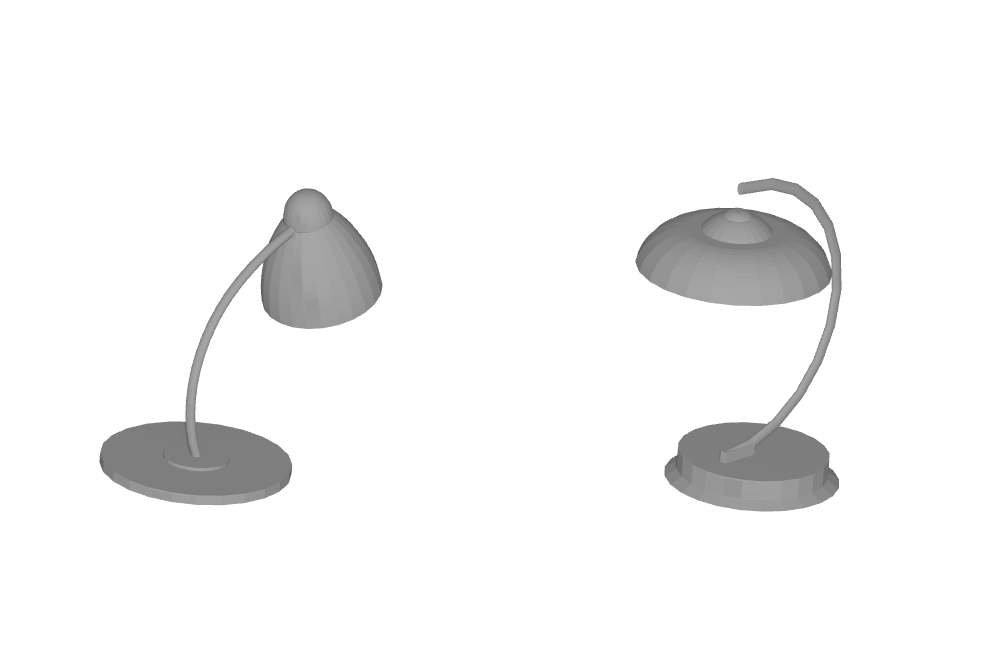

3NAPMVF0ZY8V3KTS580FO2R9J8F72C
utterance1:
Original: The shade is hanging from a wire
Spelled: the shade is hanging from a wire


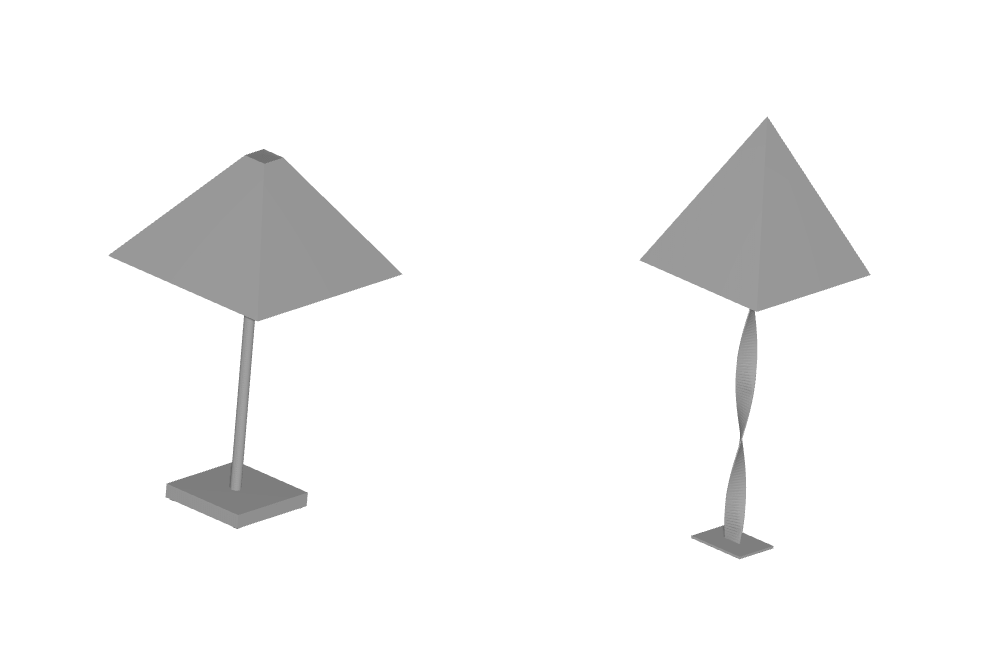

3H7Z272LX90QACJ0B0C13KH3PUHPLF
utterance1:
Original: The target has a helix shaped lamp rod.
Spelled: the target has a helix shaped lamp rod


In [ ]:
## Visualize random examples that are hard vs. easy in a given class
class_to_comp = "lamp"
hard_loc = df[(df.hard_context) & (df.source_object_class == class_to_comp)].sample().index[0]
easy_loc = df[(~df.hard_context) & (df.source_object_class == class_to_comp)].sample().index[0]
visualize_src_trg_df_at_loc_i(df, hard_loc, top_img_dir=top_img_dir)
visualize_src_trg_df_at_loc_i(df, easy_loc, top_img_dir=top_img_dir)